# Learning and Decision Making

## Laboratory 4: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the guessing game domain described in the Homework and which you described as a POMDP.

Recall that:

* The opponent can hold one of two cards in hand: an Ace of Clubs (A&clubs;) and an Ace of Diamonds (A&diams;). The agent must guess which card the opponent is holding. 

* For every right answer, the agent wins 1EUR, and every wrong answer costs the agent 1EUR. 

* The agent can also try to _peek_. 

* When the agent peeks, it sees the right card with a probability of 0.9 and the wrong card with probability 0.1.

* The game restarts whenever the agent makes a guess.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy`array with the cost that you defined in your homework.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [3]:
# Insert your code here
import numpy as np

states = ["Clubs" , "Diamonds"]

actions = ["SelectClubs", "SelectDiamonds", "Peek"]

observations = ["Clubs", "Diamonds"]

P_Peek = np.array([[1, 0], [0, 1]])

P_Clubs = np.array([[0.5, 0.5], [0.5, 0.5]])

P_Diamonds = np.array([[0.5, 0.5], [0.5, 0.5]])


O_Peek = np.array([[0.9, 0.1], [0.1, 0.9]])

O_Clubs = np.array([[0.5, 0.5], [0.5, 0.5]])

O_Diamonds = np.array([[0.5, 0.5], [0.5, 0.5]])

Cost = np.array([[0, 1, 0.5], [1, 0, 0.5]])



### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [4]:
# Insert your code here

import numpy as np

t = 0

initial_policy = np.array([[1./3, 1./3, 1./3], [1./3, 1./3, 1./3]])

sequence_states = []
sequence_actions = []
sequence_observations = []


# DUVIDA: depois de fazermos peek e observarmos algo 
# temos de actualizar de novo a observacao quando o oponente mostra que carta tem ?

while t<20:
    
    state = np.random.choice(states,1, replace=False)
    action = np.random.choice(actions,1, replace=False)
    
    if state == "Clubs":
        observation_probabilities = O_Peek[:,0] # [0.9]
                                                # [0.1]
    else:
        observation_probabilities = O_Peek[:,1] # [0.1]
                                                # [0.9]
    if action == "Peek":
        observation = np.random.choice(observations,1, replace=False, p=observation_probabilities)
    else:
        # V1
        observation = state # se a accao for adivinhar uma carta a nossa observacao
                            # vai ser igual ao estado (que e a carta que esta na mao do oponente)
        # V2
        #observation = np.random.choice(observations,1, replace=False, p=np.array([0.5, 0.5]))

    sequence_states += [state]
    sequence_actions += [action]
    sequence_observations += [observation]
    t+=1
    
    
print "STATES(carta que esta na mao do oponente)\n"
for i in sequence_states:
    print i
print "\nACTIONS(accao que o agente escolhe)\n"    
for i in sequence_actions:
    print i
print "\nOBSERVATIONS(observacao que o agente faz)\n"
for i in sequence_observations:
    print i

print "done"

STATES(carta que esta na mao do oponente)

['Clubs']
['Diamonds']
['Diamonds']
['Clubs']
['Diamonds']
['Clubs']
['Clubs']
['Diamonds']
['Clubs']
['Diamonds']
['Clubs']
['Diamonds']
['Clubs']
['Diamonds']
['Diamonds']
['Diamonds']
['Clubs']
['Clubs']
['Clubs']
['Diamonds']

ACTIONS(accao que o agente escolhe)

['SelectDiamonds']
['SelectDiamonds']
['SelectClubs']
['SelectDiamonds']
['SelectDiamonds']
['SelectDiamonds']
['SelectClubs']
['SelectClubs']
['SelectDiamonds']
['Peek']
['Peek']
['SelectClubs']
['SelectDiamonds']
['SelectClubs']
['Peek']
['Peek']
['Peek']
['SelectDiamonds']
['Peek']
['SelectDiamonds']

OBSERVATIONS(observacao que o agente faz)

['Clubs']
['Diamonds']
['Diamonds']
['Clubs']
['Diamonds']
['Clubs']
['Clubs']
['Diamonds']
['Clubs']
['Diamonds']
['Diamonds']
['Diamonds']
['Clubs']
['Diamonds']
['Diamonds']
['Diamonds']
['Clubs']
['Clubs']
['Clubs']
['Diamonds']
done


---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the initial belief is $\mathbf{b}_0=[0.5, 0.5]$. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-4}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [5]:
# Insert your code here


initial_belief = np.array([[0.5, 0.5]])
belief_list = [initial_belief]


def belief_update(belief, action, observation):
        
    if action == "Peek":
        
        Pa = P_Peek
        
        if observation == "Clubs":
            Diag_O = np.diag(O_Peek[:,0])
        else:
            Diag_O = np.diag(O_Peek[:,1])
            
    elif action == "SelectClubs" or action =="SelectDiamonds":
        
        Pa = P_Clubs # Clubs e Diamonds tem P iguais por isso nao faz diferenca
        
        if observation == "Clubs":
            Diag_O = np.diag(O_Peek[:,0])
        else:
            Diag_O = np.diag(O_Peek[:,1])

    
    aux1 = np.dot(belief, Pa * Diag_O) # belief * Pa * Diag_O
    aux2 = aux1[:,0] + aux1[:,1] # [a, b] --> a+b

    
    updated_belief = aux1/aux2
    
    return updated_belief
 
#print belief_update(initial_belief,"Peek","Diamonds")

########################################################################
########################################################################
########################################################################
unique_belief_list = [initial_belief]


for action, observation in zip(sequence_actions, sequence_observations):
    
    print initial_belief #so para a primeira belief aparecer tambem  
    
    new_belief = belief_update(initial_belief,action,observation)
    
    initial_belief = new_belief
  
    # CONFIRMAR ESTA CONDICAO
    
    
    #print unique_belief_list
    #print new_belief
    #print np.all(unique_belief_list != new_belief)
    if np.all(unique_belief_list != new_belief) and np.linalg.norm(new_belief) >= 1e-4:
        unique_belief_list += [new_belief]
        


print "\nbelief list without repetitions:"

for i in unique_belief_list:
    print i
    
print "done"

[[ 0.5  0.5]]
[[ 0.9  0.1]]
[[ 0.5  0.5]]
[[ 0.1  0.9]]
[[ 0.5  0.5]]
[[ 0.1  0.9]]
[[ 0.5  0.5]]
[[ 0.9  0.1]]
[[ 0.5  0.5]]
[[ 0.9  0.1]]
[[ 0.5  0.5]]
[[ 0.1  0.9]]
[[ 0.01219512  0.98780488]]
[[ 0.1  0.9]]
[[ 0.01219512  0.98780488]]
[[ 0.00136986  0.99863014]]
[[  1.52392563e-04   9.99847607e-01]]
[[ 0.00136986  0.99863014]]
[[ 0.01219512  0.98780488]]
[[ 0.1  0.9]]

belief list without repetitions:
[[ 0.5  0.5]]
[[ 0.9  0.1]]
[[ 0.1  0.9]]
[[ 0.01219512  0.98780488]]
[[ 0.1  0.9]]
[[ 0.00136986  0.99863014]]
[[  1.52392563e-04   9.99847607e-01]]
done


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [12]:
import numpy as np
from numpy.linalg import inv


ident = np.eye(2)

gamma = 0.9

def calc_cost_to_go(initial_policy):
    
    pi = initial_policy
    
    # ja estao la em cima é so para me organizar melhor 
    P_Peek = np.array([[1, 0], [0, 1]])
    P_Clubs = np.array([[0.5, 0.5], [0.5, 0.5]])
    P_Diamonds = np.array([[0.5, 0.5], [0.5, 0.5]]) 
    
    
    C_Peek = Cost[:,0][np.newaxis, :].T
    C_Clubs = Cost[:,1][np.newaxis, :].T
    C_Diamonds = Cost[:,2][np.newaxis, :].T

    
    Ppi = np.diag(pi[:,0]).dot(P_Peek) + \
          np.diag(pi[:,1]).dot(P_Clubs) + \
          np.diag(pi[:,2]).dot(P_Diamonds)
          
    
    Cpi = np.diag(pi[:,0]).dot(C_Peek) + \
          np.diag(pi[:,1]).dot(C_Clubs) + \
          np.diag(pi[:,2]).dot(C_Diamonds)
          
                
    
    J = np.linalg.inv(np.eye(2) - gamma * Ppi).dot(Cpi)
    
    return J

##########################################################
##########################################################
Qpeek = []
Qclubs = []
Qdiamonds = []

policy_J_optimal = np.zeros((2,2))

def calc_pol_iter():
    
    pi = initial_policy
    #pi = np.array([[0, 0, 0], [0, 0, 0]])
    
    # ja estao la em cima é so para me organizar melhor 
    P_Peek = np.array([[1, 0], [0, 1]])
    P_Clubs = np.array([[0.5, 0.5], [0.5, 0.5]])
    P_Diamonds = np.array([[0.5, 0.5], [0.5, 0.5]]) 
    
    C_Peek = Cost[:,0]
    C_Clubs = Cost[:,1]
    C_Diamonds = Cost[:,2]

    
    quit = False 
    
    while not quit:
        

        Ppi = np.diag(pi[:,0]).dot(P_Peek) + \
              np.diag(pi[:,1]).dot(P_Clubs) + \
              np.diag(pi[:,2]).dot(P_Diamonds)


        Cpi = np.diag(pi[:,0]).dot(C_Peek) + \
              np.diag(pi[:,1]).dot(C_Clubs) + \
              np.diag(pi[:,2]).dot(C_Diamonds)
                
        J = np.linalg.inv(np.eye(2) - gamma * Ppi).dot(Cpi)
        
        global Qpeek
        global Qclubs
        global Qdiamonds
        Qpeek = C_Peek+ gamma * P_Peek.dot(J)
        Qclubs = C_Clubs + gamma * P_Clubs.dot(J)
        Qdiamonds = C_Diamonds + gamma * P_Diamonds.dot(J)
        
        
        pinew = np.zeros((2,3))
        
        
        pinew[:,0] = np.isclose(Qpeek, np.min([Qpeek, Qclubs, Qdiamonds], axis=0), atol=1e-10, rtol=1e-10).astype(int)
        pinew[:,1] = np.isclose(Qclubs, np.min([Qpeek, Qclubs, Qdiamonds], axis=0), atol=1e-10, rtol=1e-10).astype(int)
        pinew[:,2] = np.isclose(Qdiamonds, np.min([Qpeek, Qclubs, Qdiamonds], axis=0), atol=1e-10, rtol=1e-10).astype(int)        
    
        pinew = pinew / np.sum(pinew, axis=1, keepdims = True)
        
        quit = (pi == pinew).all()
        pi = pinew
    
    

    return pi
    

        
    
#######################

optimal_policy = calc_pol_iter()
cost_to_go = calc_cost_to_go(optimal_policy)

print "Cost to Go:"
print cost_to_go
print "Optimal Policy:"
print optimal_policy


print Qpeek
print Qclubs
print Qdiamonds



Cost to Go:
[[ 0.]
 [ 0.]]
Optimal Policy:
[[ 1.  0.  0.]
 [ 0.  1.  0.]]
[ 0.  1.]
[ 1.  0.]
[ 0.5  0.5]


---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [78]:
# Insert your code here

#Qpeek
#Qclubs
#Qdiamonds

def MLS(belief):
    
    if belief[:,0]>=  b[:,1]:
        return actions[0]
    else:
        return actions[1]
   
    
def AV(belief):
    
    clubs_weight = belief[:,0]
    diamonds_weight = belief[:,1]
    
    if clubs_weight >= diamonds_weight:
        return actions[0]
    else :
        return actions[1]
    
    
    
def QMDP(belief):
    
    actionSC = belief[:,0]* Qclubs[0] + belief[:,1]* Qclubs[1]
    actionSD = belief[:,0]* Qdiamonds[0] + belief[:,1]* Qdiamonds[1]
    actionP = belief[:,0]* Qpeek[0] + belief[:,1]* Qpeek[1]
    
    #print actionSC
    #print actionSD
    #print actionP
        

    if actionSC<= actionSD and  actionSC< actionP:
        return actions[0]
    elif actionSD< actionSC and  actionSD< actionP:
        return actions[1]
    else:
        return actions[2]
    

    
mls=[]    
print "\nMLS Heuristic\n"
for b in unique_belief_list:
    aux1= MLS(b)
    mls+=[aux1]
    print aux1

av=[]   
print  "\nAV Heuristic\n"
for b in unique_belief_list:
    aux2= AV(b)
    av+=[aux2]
    print aux2
    
    
qmdp=[]    
print  "\nQ-MDP Heuristic\n"
for b in unique_belief_list:
    aux3= QMDP(b)
    qmdp+=[aux3]
    print aux3

    
        


MLS Heuristic

SelectClubs
SelectClubs
SelectDiamonds
SelectDiamonds
SelectDiamonds
SelectDiamonds
SelectDiamonds

AV Heuristic

SelectClubs
SelectClubs
SelectDiamonds
SelectDiamonds
SelectDiamonds
SelectDiamonds
SelectDiamonds

Q-MDP Heuristic

Peek
Peek
SelectClubs
SelectClubs
SelectClubs
SelectClubs
SelectClubs


---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors

$$
\left\{
\begin{bmatrix}
2.795\\
3.795
\end{bmatrix},
\begin{bmatrix}
3.795\\
2.795
\end{bmatrix},
\begin{bmatrix}
3.105\\
3.105
\end{bmatrix}\right\}$$

corresponding to the actions 'Guess clubs', 'Guess diamonds' and 'Peek', respectively. Represent the optimal cost-to-go function and compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

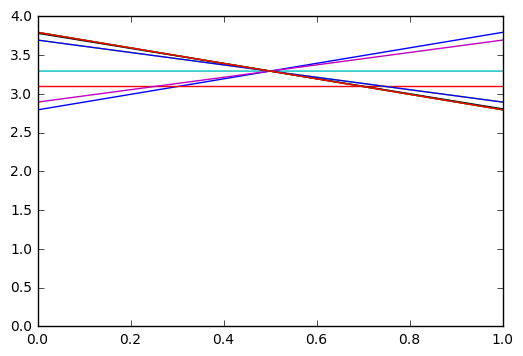


Optimal:
['Peek', 'SelectClubs', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds']

MLS:
['SelectClubs', 'SelectClubs', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds']

AV:
['SelectClubs', 'SelectClubs', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds', 'SelectDiamonds']

Q-MDP:
['Peek', 'Peek', 'SelectClubs', 'SelectClubs', 'SelectClubs', 'SelectClubs', 'SelectClubs']


In [79]:
# Insert your code here
import matplotlib.pyplot as plt
a1=[2.795, 3.795]
a2=[3.795, 2.795]
a3=[3.105, 3.105]
plt.plot(a1)
plt.plot(a2)
plt.plot(a3)


mins=[]
for b in unique_belief_list:
    ab1 = b[0].dot(a1)
    ab2 = b[0].dot(a2)
    ab3 = b[0].dot(a3)
    actval =[ab1, ab2, ab3]

    if actval.index(min(actval))==0:
        mins+=["SelectClubs"]
    elif actval.index(min(actval))==1:
        mins+=["SelectDiamonds"]
    else:
        mins+=["Peek"]
    
    plt.plot([ab1, ab2, ab3])

plt.axis([0, 1, 0, 4])
plt.show()

print "\nOptimal:"    
print mins  

print "\nMLS:"    
print mls

print "\nAV:"   
print av

print "\nQ-MDP:"    
print qmdp

